### 1. Consume the data structure in memory with each of the fields as columns and each of the records as rows.

Loaded dataset as a pandas dataframe in memory. Columns are height, weight and gender and each of the records are rows.  

In [228]:
import pandas as pd

data = pd.read_csv('dog_records.csv')

In [2]:
data.head()

,height,weight,gender
0,23.024551,30.861741,female
1,24.034770,28.137327,female
2,22.757153,20.223910,female
3,14.685089,18.998547,female
4,30.004165,27.738989,male


In [3]:
data.dtypes

height    float64
weight    float64
gender     object
dtype: object

**Check for Missing Values**

In [229]:
# Check for missing data
data.isnull().sum()

height    0
weight    0
gender    0
dtype: int64

### 2.  Create a visualization to illustrate any potential relationship between weight and height.

Weight and height variables have linear relationship with correlation of 0.81.

(0, 55)

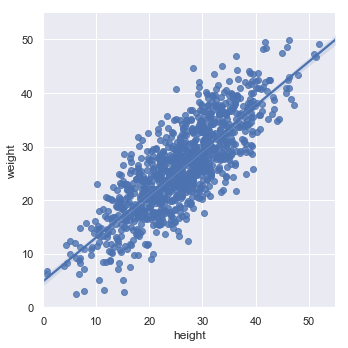

In [247]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

sns.lmplot(x="height", y="weight", data=data)
plt.xlim(0,55)
plt.ylim(0,55)

In [230]:
# correlation
data[['height', 'weight']].corr(method='pearson')

,height,weight
height,1.000000,0.813127
weight,0.813127,1.000000


### 3. Use linear regression to try to predict weight in terms of just height. Perform any analyses necessary to determine the applicability and effectiveness of the model.  Imagine our business depends on accurately predicting the weight of dogs from height – what checks would you want to perform before you would be comfortable using the model in the real world? Please explain your analyses and findings.


To evaluate the linear model that predicts weight in terms of height, I divided the data into training and test sets (90:10 split) and looked into measures like R-squared, RMSE(Root Mean Squared Error) to asses the quality of model. Further, I looked into model diagnostics plots like residual plots, QQ plot to validate the linear model. 

To launch this model in the real world, I used cross validation that provides a more reliable estimate of error and how the model will generalize to outside data.  

**Step by step approach** -

**Check for Outliers** <br>
Since outliers in the feature set can impact the slope of regression line, therefore looked at the distribution of height variable to make sure there are no extreme outliers. 

**Fitting Linear Model** <br>
**Model Performance** <br>
Training R-squared = 0.66 i.e. around 66% of variance in weight is explained by the height variable. <br>
Height Coefficient = 0.82 i.e. a unit increase in height is associated with 0.82 increase in weight. 95% Confidence Interval for height coefficient is [0.784, 0.856] and it is statistically significant <br>
Training RMSE = 4.92 i.e. how faroff the predicted weight is from actual weight, 68% of predicted values are within 1 RMSE, and 95% of values are within 2 RMSE. <br>

Test R-squared = 0.64 <br>
Test RMSE = 4.99 <br>
There isn't much difference in Rsquared and RMSE measures between the training and test sets, which indicates that the model is not overfitting. 

**Model Diagnostic plots** <br>
Residual plot is reasonably random and there is no violation of homoscedasticity. Additionally, qq plot shows that residuals follow a normal distribution. Based on these diagnostics, linear model seems to be a good fit on the dataset.

**Cross-Validation** <br>
In order to genearalize the model to real-world, cross validation provides a reliable estimate of error. Therefore, model was divided into training and test sets 10 times; each time the RMSE error was reported on test set. The average of RMSE on test sets gives the cross validation error.  Cross validation RMSE = 4.89 which is close to the RMSE on training and test sets.


**Height Distribution**

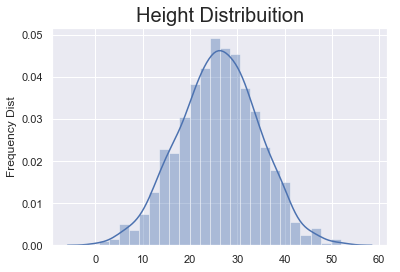

In [232]:
# Look at height distribution and outliers (if any)

sns.set_style('darkgrid')
g = sns.distplot(data['height'])
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Height Distribuition", fontsize=20)
plt.show()

**Split data into training and test sets**

In [233]:
X_train, X_test, _, _ = train_test_split(data, data['weight'], test_size=0.1, random_state = 42)

**Fit Linear Model on training set**

In [234]:
# fitting linear regression model
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg_train = smf.ols('weight ~ height', data=X_train).fit()

reg_train.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     1761.
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          7.36e-214
Time:                        15:43:14   Log-Likelihood:                -2711.1
No. Observations:                 900   AIC:                             5426.
Df Residuals:                     898   BIC:                             5436.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8751      0.532      9.157      0.000       3.830       5.920
height         0.8177      0.019     41.959      0.000       0.779       0.856
==============================================================================
Omnibus:                        0.445   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.801   Jarque-Bera (JB):                0.531
Skew:                           0.038   Prob(JB):                        0.767
Kurtosis:                       2.909   Cond. No.                         88.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [235]:
rmse_train = sqrt(mean_squared_error(X_train['weight'], reg_train.predict(X_train)))
rmse_train

4.920544574858197

**Model Diagnostics Plots**

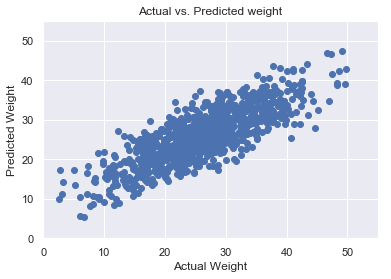

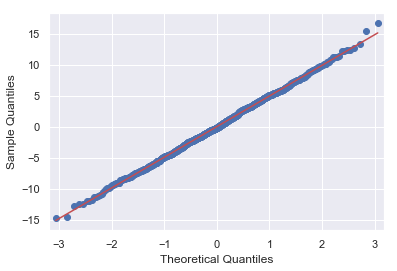

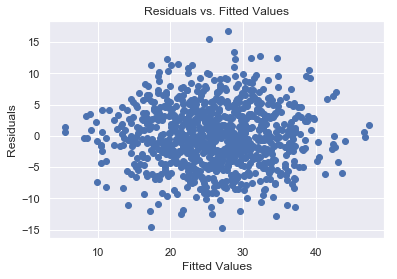

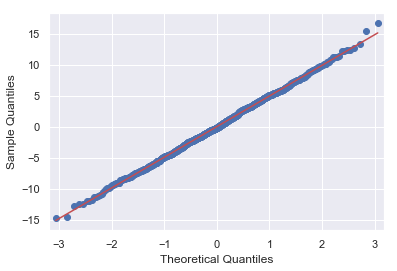

In [236]:
# Actual vs. Predicted Values
plt.scatter(x=X_train['weight'], y=reg_train.predict(X_train))
plt.title('Actual vs. Predicted weight')
plt.ylim(0,55)
plt.xlim(0,55)
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.show()

# Residuals vs. fitted plots
plt.scatter(x=reg_train.predict(X_train), y=reg_train.resid)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


# QQplot
sm.qqplot(reg_train.resid, line='r')

**Model Performance on Training and Test sets**

In [237]:
from sklearn.metrics import r2_score

rsquared_test = r2_score(X_test['weight'], reg_train.predict(X_test)) 
rmse_test = sqrt(mean_squared_error(X_test['weight'], reg_train.predict(X_test)))

print("R-squared on train set is", reg_train.rsquared)
print("RMSE on train set is", rmse_train)
print("R-squared on test set is", rsquared_test)
print("RMSE on test set is", rmse_test)

R-squared on train set is 0.6622269043593318
RMSE on train set is 4.920544574858197
R-squared on test set is 0.6430885286349142
RMSE on test set is 4.99200458734599


In [238]:
from statistics import mean

def cross_val_linear_model(var_to_predict, formula):
    cross_val_scores = []
    cross_val_n=10
    validation_size=.10

    for _ in range(cross_val_n):
        X_train, X_test, _, _ = train_test_split(
            data,
            data[var_to_predict],
            test_size=validation_size
        )

        model = smf.ols(formula=formula, data=X_train).fit()
        test_values = X_test[var_to_predict]
        score = sqrt(mean_squared_error(X_test[var_to_predict], model.predict(X_test)))
        cross_val_scores.append(score)
    
    return cross_val_scores

cross_val_rmse = cross_val_linear_model(var_to_predict = 'weight', formula='weight~height')   
mean(cross_val_rmse)

4.889121336135969

### 4.  Check whether the relationship between height and weight is different for different genders.

There is a linear relationship between height and weight for both female and male dogs. Correlation between height and weight for male dogs is 0.67. Correlation between height and weight for female dogs is 0.70 

Additionally, the relationship is nearly same between the two groups. This also indicates that gender may not add much in predicting weight. <br>

(0, 55)

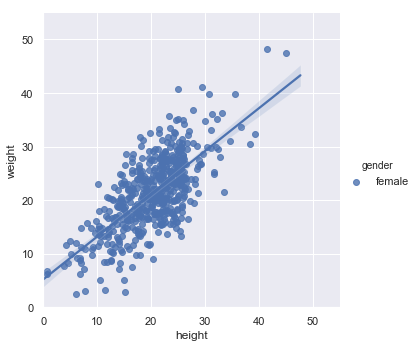

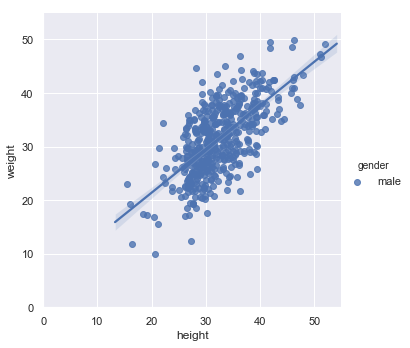

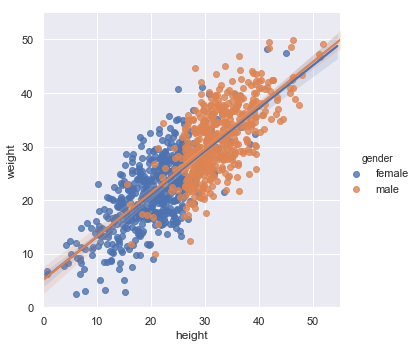

In [240]:
sns.lmplot(x="height", y="weight", hue="gender", data=data.loc[data.gender=='female'])
plt.ylim(0,55)
plt.xlim(0,55)

sns.lmplot(x="height", y="weight", hue="gender", data=data.loc[data.gender=='male'])
plt.ylim(0,55)
plt.xlim(0,55)

sns.lmplot(x="height", y="weight", hue="gender", data=data)
plt.ylim(0,55)
plt.xlim(0,55)

In [241]:
# correlation between height and weight for male
data.loc[data.gender == 'male', ['height', 'weight']].corr(method='pearson')

,height,weight
height,1.000000,0.667062
weight,0.667062,1.000000


In [242]:
# correlation between height and weight for female
data.loc[data.gender == 'female', ['height', 'weight']].corr(method='pearson')

,height,weight
height,1.000000,0.705045
weight,0.705045,1.000000


### 5. Undertake a suitable test to check whether the average weight of males is different from females.

By looking at the distribution of weight between males and females, the mean weight for males is 31 and the mean weight for females is 21. Additionally, there is no overlap in the middle 50% of values for weight between the two genders. Based on summary statistics, it seems there are differences in the distribution of weight between males and females on the given dataset.

However, by using independent 2-sample t-test, we can check if the average weight between males and females is statistically different or not.
I ran the 2-sample t-test in the two groups and the p-value < 0.05 (significance level), therefore the average weight of male dogs population is different from female dogs population.

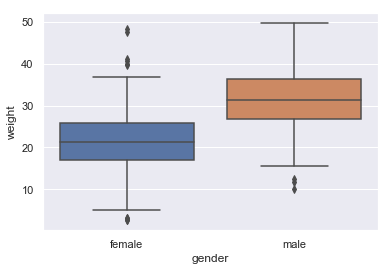

In [201]:
sns.boxplot(x=data.gender, y=data.weight)

In [73]:
data.groupby('gender')[['weight']].describe()

weight                                                                 \
        count       mean       std       min        25%       50%        75%   
gender                                                                         
female  518.0  21.376004  6.873509  2.558565  16.930414  21.42887  25.787438   
male    482.0  31.510924  6.699832  9.983568  26.772237  31.34338  36.307425   

                   
              max  
gender             
female  48.258290  
male    49.825761

**Check if the weight distribution follows Normal distribution**

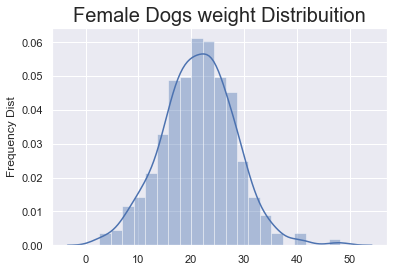

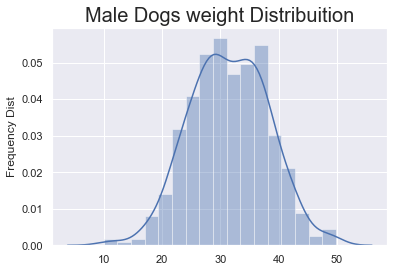

In [85]:
female_weights = data[data.gender == 'female']['weight']
male_weights = data[data.gender == 'male']['weight']

g = sns.distplot(female_weights)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Female Dogs weight Distribuition", fontsize=20)
plt.show()

g = sns.distplot(male_weights)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Male Dogs weight Distribuition", fontsize=20)
plt.show()

In [216]:
# We can use independent 2-sample t-test to check whether the average weight of male dog population is different from female dog population

# Null H0: There is no difference in the average weight between males and females.
# Alternate H0: There are differences in average weight between males and females
from scipy import stats

stats.ttest_ind(female_weights, male_weights) #significant as p-val < 0.05

Ttest_indResult(statistic=-23.583925707469394, pvalue=4.252125628836683e-98)

In [220]:
'{:f}'.format(stats.ttest_ind(female_weights, male_weights).pvalue)

'0.000000'

### 6. Use a suitable method to add gender as a predictor variable and include the following:
      a. Re-assess the quality of prediction with a suitable measure
      b. State which of the predictor variables are significant predictors of weight

**a.** After adding gender as a predictor variable, there isn't any improvement in Rsquared and RMSE for both training and test sets. <br>
**Training Rsquared and RMSE** <br>
Training set Rsquared: 0.66<br>
Training set RMSE: 4.92
**Test Rsqaured and RMSE** <br>
Test set Rsquared: 0.64<br>
Test set RMSE: 4.99

**b.** Based on the model summary, height variable is statistically significant (p-value < 0.05) whereas gender is not statistically significant (p_value = 0.5). 95% confidence interval for gender coefficient contains 0, i.e changes in gender are not associated with changes in weight. Therefore, height is the significant predictor of weight. 

In [243]:
import statsmodels.api as sm

data['sex'] = data['gender'].replace({'male':1, 'female':0})
X_train, X_test, _, _ = train_test_split(data, data['weight'], test_size=0.1, random_state = 42)

reg_train_model2 = smf.ols('weight ~ height + sex', data=X_train).fit()

reg_train_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     880.0
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          3.10e-212
Time:                        15:46:12   Log-Likelihood:                -2710.9
No. Observations:                 900   AIC:                             5428.
Df Residuals:                     897   BIC:                             5442.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0808      0.615      8.261      0.000       3.874       6.288
height         0.8040      0.028     28.330      0.000       0.748       0.860
sex            0.3201      0.479      0.669      0.504      -0.619       1.260
==============================================================================
Omnibus:                        0.414   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.813   Jarque-Bera (JB):                0.497
Skew:                           0.038   Prob(JB):                        0.780
Kurtosis:                       2.914   Cond. No.                         114.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [244]:
rmse_train = sqrt(mean_squared_error(X_train['weight'], reg_train_model2.predict(X_train)))
rsquared_test = r2_score(X_test['weight'], reg_train_model2.predict(X_test)) 
rmse_test = sqrt(mean_squared_error(X_test['weight'], reg_train_model2.predict(X_test)))

print("R-squared on train set is", reg_train_model2.rsquared)
print("RMSE on train set is", rmse_train)
print("R-squared on test set is", rsquared_test)
print("RMSE on test set is", rmse_test)

R-squared on train set is 0.6623951320823678
RMSE on train set is 4.919319084855967
R-squared on test set is 0.643207948949742
RMSE on test set is 4.991169370937509
